# Support Vector Machine

- SVM address the problem of class overlap when perfectly separating hyperplanes does not exits.
- SVM allows for some points to be on the wrong side of the margin, which is done by introduction slack variale in the optimization problem.
- Use kernels to find non-linear decision boundaries

# Implementation Using Sklearn

## Step 1: Import Necessary Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Step 2: Load and Prepare the Dataset

In [12]:
# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take only two features for visualization
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 3: Train an SVM Model

In [16]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')  # Using a linear kernel
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

## Step 4: Make Predictions

In [19]:
# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.90


## Step 5: Visualizing the Decision Boundary

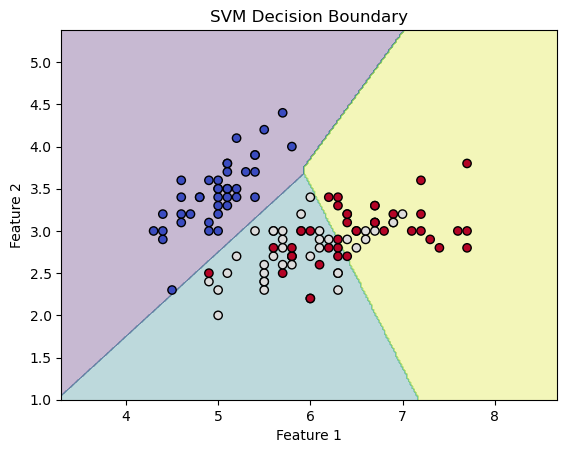

In [22]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, svm_model)
